## 線性回歸預測房價

In [1]:
import numpy as np
import pandas as pd

In [2]:
housedatas=pd.read_csv("housedataset/kc_house_data.csv", encoding="utf-8")
housedatas.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [3]:
len(housedatas)

21613

In [4]:
myfeatures=['price','bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade']
mostfeatures=['price','bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade',
              'waterfront', 'view','yr_built','lat','long']
housedata=housedatas[mostfeatures]
housedata.head(3)

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,waterfront,view,yr_built,lat,long
0,221900.0,3,1.00,1180,1.0,3,7,0,0,1955,47.5112,-122.257
1,538000.0,3,2.25,2570,2.0,3,7,0,0,1951,47.7210,-122.319
2,180000.0,2,1.00,770,1.0,3,6,0,0,1933,47.7379,-122.233


In [5]:
housedata=housedata.astype('float')
housedata.head(3)

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,waterfront,view,yr_built,lat,long
0,221900.0,3.0,1.00,1180.0,1.0,3.0,7.0,0.0,0.0,1955.0,47.5112,-122.257
1,538000.0,3.0,2.25,2570.0,2.0,3.0,7.0,0.0,0.0,1951.0,47.7210,-122.319
2,180000.0,2.0,1.00,770.0,1.0,3.0,6.0,0.0,0.0,1933.0,47.7379,-122.233


In [6]:
housedata2=housedata.drop(columns=['price'])
housedata2.head(3)

,bedrooms,bathrooms,sqft_living,floors,condition,grade,waterfront,view,yr_built,lat,long
0,3.0,1.00,1180.0,1.0,3.0,7.0,0.0,0.0,1955.0,47.5112,-122.257
1,3.0,2.25,2570.0,2.0,3.0,7.0,0.0,0.0,1951.0,47.7210,-122.319
2,2.0,1.00,770.0,1.0,3.0,6.0,0.0,0.0,1933.0,47.7379,-122.233


In [7]:
from sklearn import model_selection
X = np.array(housedata2)
Y = np.array(housedata['price'])
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
model.coef_

array([-3.24404846e+04,  3.82413427e+04,  1.78860894e+02,  1.73655405e+04,
        2.70583491e+04,  1.04424790e+05,  6.08665212e+05,  4.96004607e+04,
       -2.63093300e+03,  5.54397118e+05, -7.97686039e+04])

In [10]:
model.intercept_

-31668069.907832775

In [11]:
model.score(X_train,Y_train)

0.6964225016568126

In [12]:
model.score(X_validation,Y_validation)

0.6771487609400739

In [13]:
# model.predict([[3.0,2.0,3000.0,4000.0,2.0,2.0,4.0,6.0,0.0]])

In [14]:
import matplotlib.pyplot as plt
from matplotlib import pylab

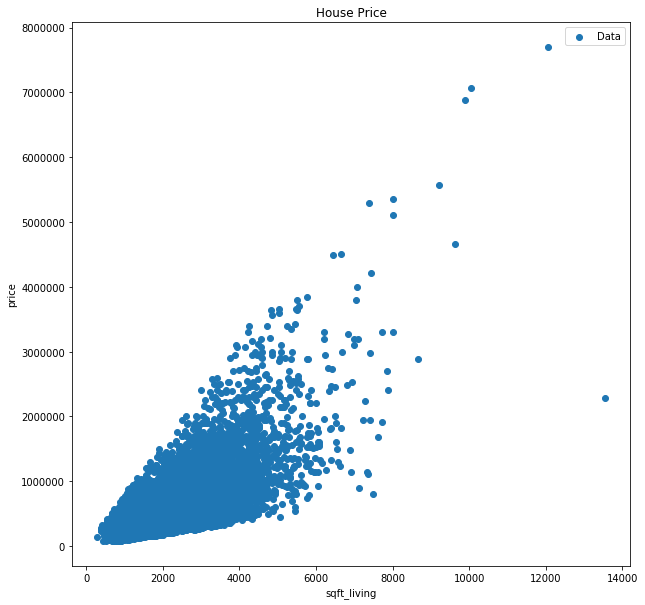

(<matplotlib.legend.Legend at 0x1de9a966c48>, None)

In [15]:
x2 = np.array(housedata['sqft_living'])
# plotY = model.predict(x2)
plt.figure(figsize = (10,10))
plt.scatter(x2,Y, label = 'Data')
# plt.plot(x2,plotY, color = 'Red', label = 'Model')
plt.title('House Price')
plt.xlabel('sqft_living'), plt.ylabel('price')
plt.legend(), plt.show()

In [16]:
# plt.plot(np.array(housedata['sqft_living']),Y,'.',
#         np.array(housedata['sqft_living']),model.predict(X))

In [19]:
house2 = housedatas[housedatas['id']==1925069082]
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000.0,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [20]:
house2=house2[mostfeatures]
house2

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,waterfront,view,yr_built,lat,long
1361,2200000.0,5,4.25,4640,2.0,5,8,1,4,1952,47.6393,-122.097


In [21]:
house55=house2.drop(columns=['price'])

In [22]:
house55=np.array(house55)
model.predict(house55)

array([1989672.77291104])

In [23]:
from sklearn.svm import SVR

In [24]:
models = SVR( kernel = 'sigmoid')
models.fit(X,Y)
models.score(X,Y)

C:\Users\Daniel\Anaconda3\envs\tfenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.06021729911028717